# Credit Card Fraud Detection

## data from [kaggle](https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud/data)

信用卡公司能夠識別詐欺性信用卡交易非常重要，這樣客戶就不會因未購買的商品而被收取費用

特徵 V1、V2、…V28 是透過 PCA 獲得的主要成分，唯一未透過 PCA 轉換的特徵是「Time」和「Amount」

特徵「Time」包含資料集中每個事務與第一個事務之間經過的秒數

特徵「Amount」是交易金額，該特徵可用於範例相關的成本敏感學習

特徵「Class」是回應變量，如果有欺詐，則取值 1，否則取值 0

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore')

In [2]:
df = pd.read_csv('creditcard.csv')

print(df.shape)
df.head()

(284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
# 查看缺失值
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [4]:
Fraud = df[df['Class'] == 1].shape[0]
print(Fraud)

492


In [5]:
# 查看重複資料
df.duplicated().sum()

1081

In [6]:
duplicated = df.duplicated() 
df_duplicated = df[duplicated]
df_duplicated

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
33,26.0,-0.529912,0.873892,1.347247,0.145457,0.414209,0.100223,0.711206,0.176066,-0.286717,...,0.046949,0.208105,-0.185548,0.001031,0.098816,-0.552904,-0.073288,0.023307,6.14,0
35,26.0,-0.535388,0.865268,1.351076,0.147575,0.433680,0.086983,0.693039,0.179742,-0.285642,...,0.049526,0.206537,-0.187108,0.000753,0.098117,-0.553471,-0.078306,0.025427,1.77,0
113,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
114,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
115,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282987,171288.0,1.912550,-0.455240,-1.750654,0.454324,2.089130,4.160019,-0.881302,1.081750,1.022928,...,-0.524067,-1.337510,0.473943,0.616683,-0.283548,-1.084843,0.073133,-0.036020,11.99,0
283483,171627.0,-1.464380,1.368119,0.815992,-0.601282,-0.689115,-0.487154,-0.303778,0.884953,0.054065,...,0.287217,0.947825,-0.218773,0.082926,0.044127,0.639270,0.213565,0.119251,6.82,0
283485,171627.0,-1.457978,1.378203,0.811515,-0.603760,-0.711883,-0.471672,-0.282535,0.880654,0.052808,...,0.284205,0.949659,-0.216949,0.083250,0.044944,0.639933,0.219432,0.116772,11.93,0
284191,172233.0,-2.667936,3.160505,-3.355984,1.007845,-0.377397,-0.109730,-0.667233,2.309700,-1.639306,...,0.391483,0.266536,-0.079853,-0.096395,0.086719,-0.451128,-1.183743,-0.222200,55.66,0


In [7]:
df = df.drop_duplicates()

In [8]:
Fraud = df[df['Class'] == 1].shape[0]
print('after drop duplicated, how many Fraud left:',Fraud)

after drop duplicated, how many Fraud left: 473


## 得到的資料分析
### 1. 總共有 284807 筆資料
### 2. 沒有欄位有缺失值
### 3. 重複資料有 1081 筆
### 4. 詐欺案件有 492 筆
### 5. 經過刪除重複資料後，剩下總共283726筆資料(詐欺案件剩下 473 筆)

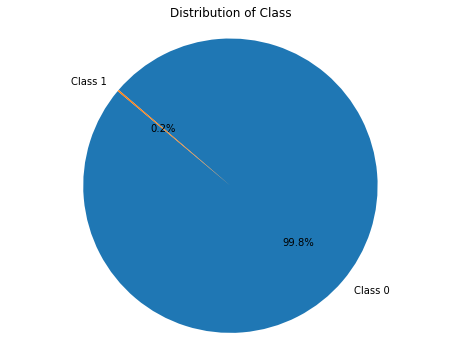

In [9]:
# 計算每個 class 的資料數量
count_class_0 = df[df['Class'] == 0].shape[0]
count_class_1 = df[df['Class'] == 1].shape[0]

# 資料
sizes = [count_class_0, count_class_1]
labels = ['Class 0', 'Class 1']

# 圓餅圖
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Class')
plt.axis('equal')  # 使圓餅圖比例相等
plt.show()

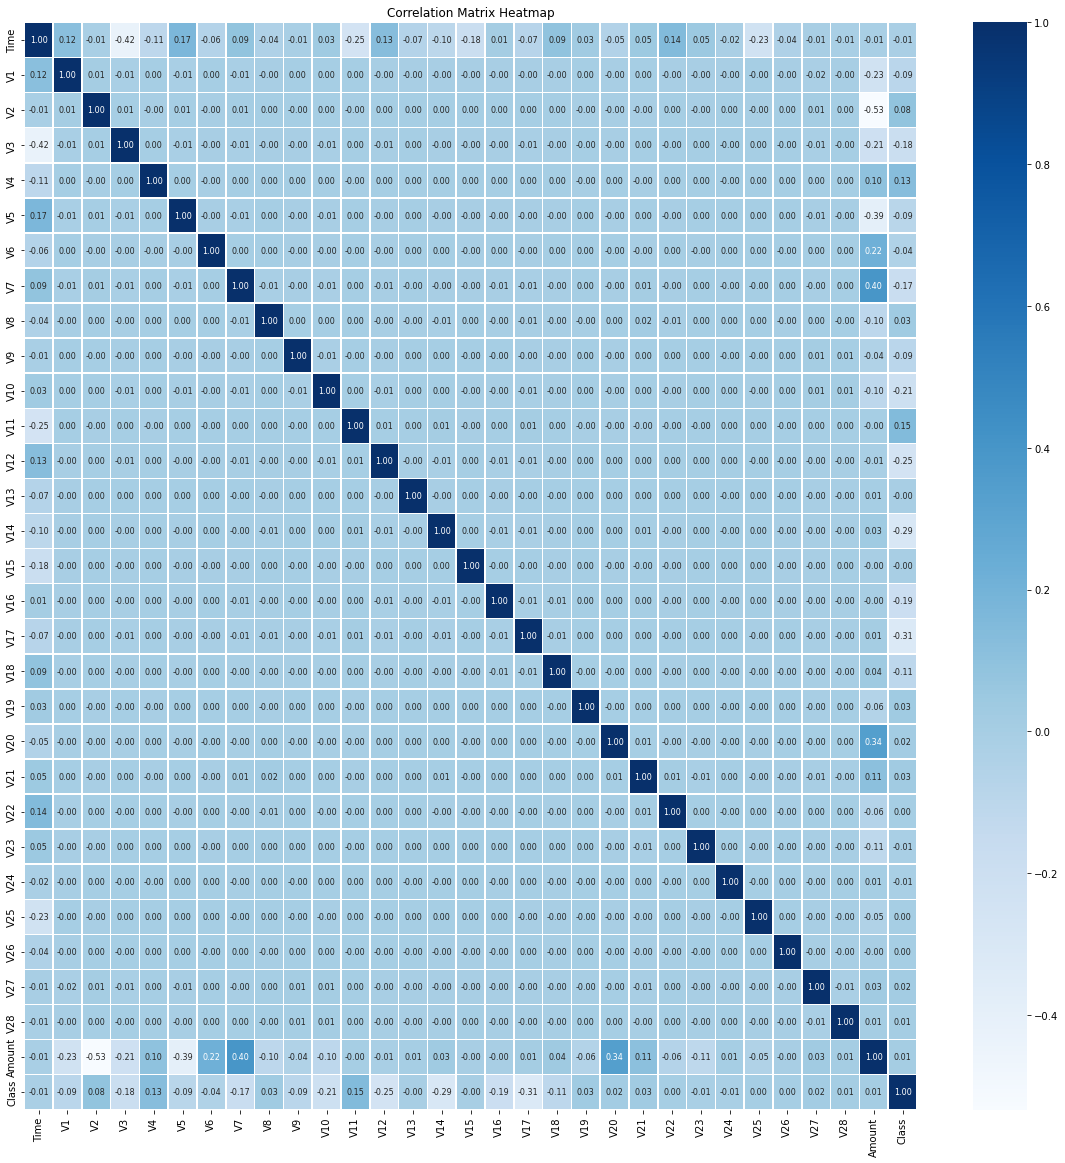

In [10]:
# 繪製相關矩陣
correlation_matrix = df.corr()

plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', fmt='.2f', linewidths=.5, annot_kws={"size": 8})
plt.title('Correlation Matrix Heatmap')
plt.show()

## 標準化

In [11]:
from sklearn.preprocessing import StandardScaler

# 建立 StandardScaler 實例
std_scaler = StandardScaler()

y = df['Class']
x = df.drop('Class', axis=1)
x = pd.DataFrame(std_scaler.fit_transform(x), columns=x.columns)

## 欠採樣

In [12]:
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

# 創建 RandomUnderSampler 
under_sampler = RandomUnderSampler(sampling_strategy=0.1, random_state=42)

# 對特徵矩陣 x 和目標變量 y 進行欠採樣
x_resampled, y_resampled = under_sampler.fit_resample(x, y)

# 打印欠採樣後的類別分佈
print('Resampled class distribution:', Counter(y_resampled))

Resampled class distribution: Counter({0: 4730, 1: 473})


## Split data

In [13]:
from sklearn.model_selection import train_test_split

# 將數據集拆分為訓練集和測試集
x_train, x_test, y_train, y_test = train_test_split(x_resampled, y_resampled, test_size=0.2, shuffle=True , stratify=y_resampled, random_state=42)

# 打印拆分後的訓練集和測試集大小
print("Training set size:", len(x_train))
print("Test set size:", len(x_test))
print("Training set Fraud:", sum(y_train == 1))
print("Testing set Fraud:", sum(y_test == 1))

Training set size: 4162
Test set size: 1041
Training set Fraud: 378
Testing set Fraud: 95


## XGBoost

In [14]:
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score

# 創建 XGBoost 分類器
xgb = XGBClassifier(random_state=42)

# 使用整個訓練集進行訓練
xgb.fit(x_train, y_train)

# 預測測試集
y_pred = xgb.predict(x_test)

# 進行交叉驗證，並計算分數
cv_scores = cross_val_score(xgb, x_train, y_train, cv=5)  # 這裡的cv可以改變交叉驗證的折數

[19:16:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:16:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:16:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:17:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

Cross Validation Scores: [0.98559424 0.9879952  0.98197115 0.98317308 0.98197115]
Mean CV Score: 0.9841409640779389
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       946
           1       0.99      0.87      0.93        95

    accuracy                           0.99      1041
   macro avg       0.99      0.94      0.96      1041
weighted avg       0.99      0.99      0.99      1041





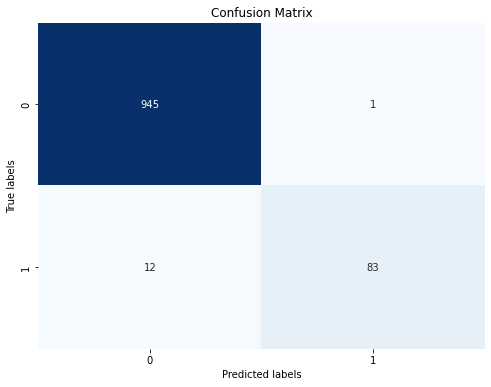

In [15]:
from sklearn.metrics import confusion_matrix, classification_report

# 輸出交叉驗證的分數
print("Cross Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())

# 產生分類報告
class_report = classification_report(y_test, y_pred)
print(class_report)
print('\n')

# 產生混淆矩陣
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()